# Wiederholung: Berechnung deskriptiver Statistiken
Wir hatten einen Datensatz mit dem Bargeld von Studierenden in einer Liste. Hier berechnen wir zur summarischen Beschreibung dieser Daten Mittelwert, Varianz und Standardabweichung.

In [ ]:
bargeld = [32, 4, 46, 12, 18]
mittelwert = sum(bargeld) / len(bargeld) #Mittelwert = Summe durch Anzahl der Messungen
print(mittelwert)

Uns interessiert, wie sehr die einzelnen Studierenden im Schnitt vom arithmetischen Mittel abweichen. Da die durchschnittliche Abweichung, wie wir gesehen hatten, immer 0 ergibt, berechnen wir stattdessen die quadratischen Abweichungen (Erinnerung: ein Quadrat zweier Zahlen ist immer positiv). Zur Veranschaulichung tun wir dies in einer Schleife für jedes Element der Liste einzeln.

In [ ]:
quadrAbw = [] #dies legt eine neue Liste an, in die wir für jede*n Studierenden 
              #die quadrierte Abweichung vom Mittelwert eintragen.
for index in range(len(bargeld)) : #"range(len(bargeld))" gibt den Befehl, durch die Liste zu iterieren.
    studAbw = (bargeld[index] - mittelwert)**2 
    print(studAbw)
    quadrAbw.append(studAbw)
    print(quadrAbw)

Bekanntlich ist die Varianz die durchschnittliche quadrierte Abweichung. Wir bilden also aus der Liste quadrAbw wiederum den Mittelwert. Nun gibt es noch das Problem, dass die resultierende Zahl schwierig zu interpretieren ist (Was ist ein Quadrat-Euro?). Deswegen ziehen wir die Wurzel und erhalten die Standardabweichung.

In [ ]:
import math #das math-Paket brauchen wir für die Quadratwurzelfunktion
varianz = sum(quadrAbw) / len(quadrAbw)
standardabweichung = math.sqrt(varianz)
print('Die Varianz beträgt: '+ str(varianz))
print('Die Standardabweichung beträgt: '+ str(standardabweichung))

# Analyse von statistischen Zusammenhängen
Wir haben die Hypothese, dass wohlhabendere Studierende auch mehr Bargeld mit sich herumschleppen. Wir fragen deswegen die gleichen Studierenden (in der gleichen Reihenfolge) nach ihrem Monatseinkommen und halten die Daten wiederum in einer Liste fest. Auch hier berechnen wir Mittelwert, Varianz und Standardabweichung. Die Prozedur ist dieselbe wie oben, nur der Code ist etwas sparsamer.

In [ ]:
einkommen = [880, 690, 1012, 744, 870]
mittelwertEinkommen = sum(einkommen) / len(einkommen)
varianzEinkommen = sum([(student - mittelwertEinkommen)**2 for student in einkommen]) / len(einkommen)
standardabweichungEinkommen = math.sqrt(varianzEinkommen)
print(mittelwertEinkommen)
print('Die Varianz beträgt: '+ str(varianzEinkommen))
print('Die Standardabweichung beträgt: '+ str(standardabweichungEinkommen))

Nach unserer Hypothese sollten Studierende mit einem überdurchschnittlichen Einkommen tendenziell überdurchschnittlich viel Bargeld dabei haben. Wir können das prüfen, indem wir die so genannte "Kovarianz" berechnen. Dabei multiplizieren wir für jede_n Studierenden die Abweichung vom Mittelwert in der einen Variablen (Bargeld) mit der Abweichung vom Mittelwert in der anderen Variablen. Der Übersichtlichkeit halber programmieren wir das wieder als Schleife: 

In [ ]:
koAbw = [] #dies legt eine neue Liste an, in die wir für jede*n Studierenden 
           #das Produkt der Abweichungen vom Mittelwert der beiden Variablen eintragen.
for index in range(len(bargeld)) : #"range(len(bargeld))" gibt den Befehl, durch die Liste zu iterieren.
    studAbw = (bargeld[index] - mittelwert) * (einkommen[index] - mittelwertEinkommen) 
    print(studAbw)
    koAbw.append(studAbw)
    print(koAbw)

Positive Zahlen bedeuten hier einen Zusammenhang in der vermuteten Richtung: entweder geht überdurchschnittliches Einkommen mit überdurchschnittlich viel Bargeld einher, oder unterdurchschnittlich viel Einkommen mit unterdurchschnittlich viel Bargeld (weil minus mal minus ebenfalls plus ergibt). Wenn wir nun also wieder die durchschnittliche Ko-Abweichung berechnen (wie bei der Varianz, nur eben die Ko-Varianz), so gibt uns das schon mal einen ganz guten Hinweis über die Gültigkeit unserer Hypothese.

In [ ]:
kovarianz = sum(koAbw) / len(koAbw)
print('Die Kovarianz zwischen Einkommen und Bargeld beträgt: ' + str(kovarianz))

Gut, das ist schon mal eine positive Zahl und deutet darauf hin, dass wir mit unserer Hypothese wohl richtig liegen. Allerdings fällt es schwer, die Kovarianz zu interpretieren. Ist das nun ein starker Zusammenhang oder eher ein leichter? Um die Frage zu beantworten, relativieren wir die Kovarianz am Produkt der Standardabweichungen der beiden Variablen und erhalten den sog. Korrelationskoeffizienten nach Pearson.

In [ ]:
pearsonKorrelation = kovarianz / (standardabweichung * standardabweichungEinkommen)
print('Die Korrelation zwischen Einkommen und Bargeld beträgt: ' + str(pearsonKorrelation))

Der Korrelationskoeffizient nach Pearson (abgekürzt mit r oder griechisch rho) kann sich mathematisch nur zwischen r=1 (für einen perfekten Zusammenhang) und r=-1 (für einen perfekten negativen Zusammenhang, d.h. in dem Beispiel, wer höheres Einkommen hat, hätte weniger Bargeld dabei) bewegen. Wenn es keinen Zusammenhang gibt, ist r=0. In unserem Beispiel spricht der empirisch gefundene Wert von etwa r = 0,96 für einen ziemlich starken, fast perfekten Zusammenhang. D.h. es ist tatsächlich so, dass Studierende mit einem höheren Einkommen auch tendenziell mehr Bargeld dabei haben. Nicht vergessen, dass das ein hypothetisches Beispiel war. In der Praxis kommen derart starke Zusammenhänge so gut wie nicht vor; alles ab etwa r=0.5 ist als empirisch ziemlich bedeutsamer Zusammenhang zu betrachten.

# Berechnung mit Pandas
Natürlich ist es wiederum nicht sehr effizient, solche Rechnungen mit Listen und Schleifen zu programmieren. Natürlich hat Pandas eine eingebaute Korrelationsfunktion. Um sie zu nutzen, wandeln wir die Listen zunächst in Pandas-Serienobjekte um. Dann benutzen wir die Funktion "corr" (Dokumentation siehe: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html), um unsere Rechnung abzukürzen.

In [ ]:
import pandas as pd #nicht vergessen ;)

einkommenPd = pd.Series(einkommen)
bargeldPd = pd.Series(bargeld)

pearsonKorrelationPandas = einkommenPd.corr(bargeldPd) 
print(pearsonKorrelationPandas)

Nun sind wir in der Lage, einfache Zusammenhangshypothesen für unsere städtischen Beispiele zu untersuchen. Wir nehmen etwa an, dass in Potsdamer Stadtvierteln, in denen wenige junge Menschen wohnen, viele ältere Menschen wohnen. Mit anderen Worten, wir vermuten r < 0 für die Zahl der Potsdamer U18 und Ü65 aus dem Beispieldatensatz, den wir nun zunächst wieder in Python laden.

In [1]:
import pandas as pd
potsdam = pd.read_csv('PotsdamBezirke.csv')
potsdam.head() #dies ist übrigens ein netter Befehl, um nur die ersten 5 Zeilen eines Dataframe anzuzeigen.

,Bezirk,Einwohner,Einwohner 0-18,Einwohner 18-65,Einwohner 65+
0,Babelsberg Nord,11016,2294,7188,1534
1,Babelsberg Süd,11377,1672,7770,1935
2,Berliner Vorstadt,2415,406,1464,545
3,Bornim,2747,483,1816,448
4,Bornstedt,9169,1972,5767,1430


In [2]:
korrelationJungeAlte = potsdam['Einwohner 0-18'].corr(potsdam['Einwohner 65+'])
print(korrelationJungeAlte)

0.826088137969


Mhm. Das ist unerwartet. Was ist hier los? Mit folgendem Code verschaffen wir uns einen Überblick über alle Variablenzusammenhänge in dem DataFrame.

In [3]:
potsdam.corr()

,Einwohner,Einwohner 0-18,Einwohner 18-65,Einwohner 65+
Einwohner,1.000000,0.952538,0.996135,0.942113
Einwohner 0-18,0.952538,1.000000,0.953333,0.826088
Einwohner 18-65,0.996135,0.953333,1.000000,0.914253
Einwohner 65+,0.942113,0.826088,0.914253,1.000000


Ach so, wir haben nicht an der Gesamteinwohnerzahl relativiert. In Vierteln mit vielen Einwohnern überhaupt wohnen natürlich sowohl viele Ältere als auch viele Jüngere. Daher die positive, nicht negative, Korrelation. Wir definieren daher zunächst mal neue Variablen mit dem relativen Anteil Älterer und Jüngerer pro Stadtviertel.

In [4]:
potsdam['U18rel'] = potsdam['Einwohner 0-18'] / potsdam['Einwohner']
potsdam['Ue65rel'] = potsdam['Einwohner 65+'] / potsdam['Einwohner']

In [5]:
potsdam.head() #Mal schauen, ob das geklappt hat.

,Bezirk,Einwohner,Einwohner 0-18,Einwohner 18-65,Einwohner 65+,U18rel,Ue65rel
0,Babelsberg Nord,11016,2294,7188,1534,0.208243,0.139252
1,Babelsberg Süd,11377,1672,7770,1935,0.146963,0.170080
2,Berliner Vorstadt,2415,406,1464,545,0.168116,0.225673
3,Bornim,2747,483,1816,448,0.175828,0.163087
4,Bornstedt,9169,1972,5767,1430,0.215073,0.155960


Nun probieren wir es nochmal: Gibt es in Stadtteilen mit verhältnismäßig vielen jüngeren Potsdamer_innen verhältnismäßig wenige Ältere (und umgekehrt)?

In [6]:
korrelationJungeAlte = potsdam['U18rel'].corr(potsdam['Ue65rel'])
print(korrelationJungeAlte)

-0.625188003383


Nun fällt das Ergebnis wie erwartet aus. Man sieht: Korrelationsrechnung hat ihre Tücken und man muss sich sehr genau überlegen, welche Daten man benutzt.

# Plotting
Schließlich wollen wir noch ein paar grundlegende Visualisierungstechniken kennen lernen. Wir benutzen dafür das zu diesem Zweck entwickelte Python-Paket matplotlib (Dokumentation siehe: https://matplotlib.org).

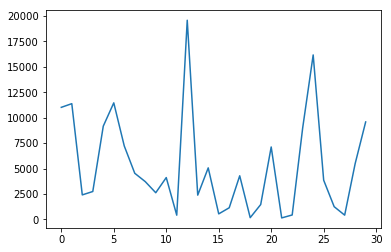

In [7]:
import matplotlib.pyplot as plt

plt.plot(potsdam['Einwohner']) #dieser Befehl legt ein einfaches Plot an
plt.show() #...das ist aber erst mal nur ein Objekt, das wir explizit mit "show" anzeigen müssen.

Mhm, das ist zwar schon mal ein Chart, aber vielleicht kein so aussagekräftiges?

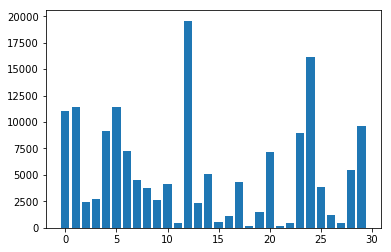

In [8]:
plt.bar(range(len(potsdam)), potsdam['Einwohner'])
plt.show()

Dieses Balkendiagramm ("Barchart") sieht schon viel besser aus. Allerdings ist die Achsenbeschriftung nicht wirklich sinnvoll. Was wir wollen, sind die Bezirksnamen.

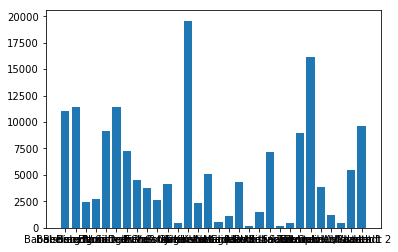

In [9]:
plt.bar(range(len(potsdam)), potsdam['Einwohner'])
plt.xticks(range(len(potsdam)), potsdam['Bezirk'])
plt.show()

Das sieht zwar nach Bezirksnamen aus, aber sie sind alle übereinandergeschrieben, so dass man sie nicht lesen kann.

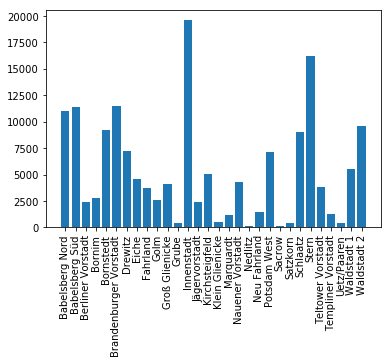

In [14]:
plt.bar(range(len(potsdam)), potsdam['Einwohner'])
plt.xticks(range(len(potsdam)), potsdam['Bezirk'], rotation=90) #der rotation-Parameter ist in Winkel-Grad.
plt.show()

Das ist ja schon mal ganz brauchbar, aber wir wollen das ganze noch etwas hübscher machen.

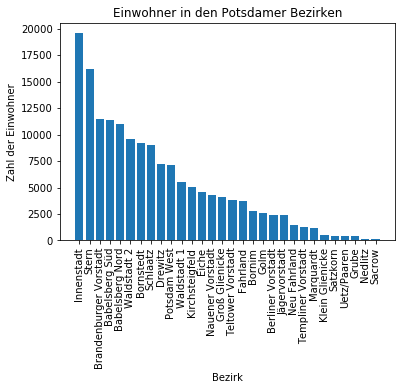

In [15]:
plt.bar(range(len(potsdam)), potsdam.sort_values('Einwohner',ascending=False)['Einwohner']) #sortieren nach Größe
plt.xticks(range(len(potsdam)), potsdam.sort_values('Einwohner',ascending=False)['Bezirk'], rotation=90) 
plt.title('Einwohner in den Potsdamer Bezirken') #Fügt einen Diagrammtitel hinzu
plt.xlabel('Bezirk') #Fügt eine x-Achsen-Beschriftung hinzu
plt.ylabel('Zahl der Einwohner') #Fügt eine y-Achsen-Beschriftung hinzu
plt.show() #erst wenn alles fertig ist, zeigen wir die Grafik an.

Und jetzt wollen wir noch ein Balkendiagramm mit mehreren Variablen betrachten.

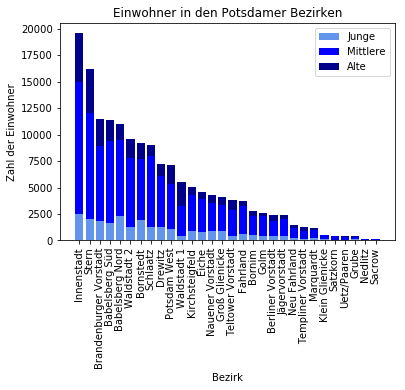

In [16]:
junge = potsdam.sort_values('Einwohner',ascending=False)['Einwohner 0-18']
mittlere = potsdam.sort_values('Einwohner',ascending=False)['Einwohner 18-65']
alte = potsdam.sort_values('Einwohner',ascending=False)['Einwohner 65+']
#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer.

serie1 = plt.bar(range(len(potsdam)), junge, color='CornflowerBlue') 
serie2 = plt.bar(range(len(potsdam)), mittlere, bottom=junge, color='Blue') #legt den Balken für "mittlere" auf den Balken für "junge"
serie3 = plt.bar(range(len(potsdam)), alte, bottom=junge+mittlere, color='DarkBlue') 
plt.xticks(range(len(potsdam)), potsdam.sort_values('Einwohner',ascending=False)['Bezirk'], rotation=90) 
plt.title('Einwohner in den Potsdamer Bezirken') 
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
plt.legend((serie1,serie2,serie3), ('Junge','Mittlere','Alte')) #Fügt eine Legende hinzu.
plt.show() 

Übrigens findet sich hier eine Liste zulässiger Farbnamen: https://www.w3schools.com/colors/colors_names.asp

Schließlich ist noch die Frage wichtig, wie man Zusammenhänge visualisieren kann. Wir nehmen zu diesem Zweck das obige Beispiel des Zusammenhangs zwischen dem Anteil der jüngeren und älteren Einwohner in den Bezirken auf. Der Diagrammtyp, mit dem man üblicherweise Zusammenhämmnge darstellt, nennt sich Scatterplot. (gerade bei Zeitreihen kann man allerdings Zusammenhänge auch mit Liniendiagrammen ...plt.plot()... darstellen, was wir aber hier nicht vertiefen)

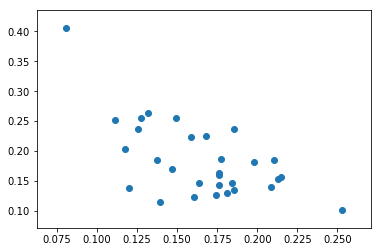

In [17]:
plt.scatter(potsdam['U18rel'], potsdam['Ue65rel'])
plt.show()

Das sieht schon mal brauchbar aus, muss aber ebenfalls noch "hübsch" gemacht werden.

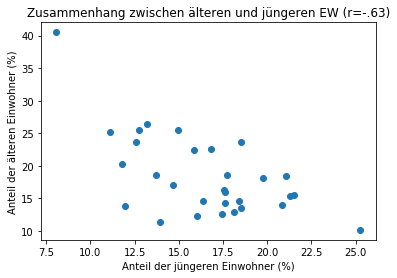

In [20]:
plt.scatter(potsdam['U18rel']*100, potsdam['Ue65rel']*100) #Umrechnung in Prozent
plt.xlabel('Anteil der jüngeren Einwohner (%)')
plt.ylabel('Anteil der älteren Einwohner (%)')
plt.title('Zusammenhang zwischen älteren und jüngeren EW (r=-.63)')
plt.show()

Abb. 1. Zusammenhang zwischen älteren und jüngeren Einwohnern in Potsdam. Wie man sieht, gibt es einen deutlichen.... aber...